# Expense Analyzer

- Date : 01/02/2020
- Author : Aditya Warnulkar (adwarnulkar@gmail.com)

In [1]:
# expense from finance app
expenses_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/expenses_april_2020.xls' # Expense report from Toshl finance

# budget allocation for this month
budget_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/budget_april_2020.csv' # Budget file as per your standard of living

# 401k , HSA , ESPP contribution
company_deductions = 1376.23 + 1376.23

# Gross - TAX - company deductions
salary = (5428-1766.62) + (5428-1765.50) - company_deductions # Take home salary (After TAX/ESPP/HSA/401K)

In [2]:
salary

4571.42

In [3]:
company_deductions

2752.46

In [4]:
import sys
import os
import re

import pandas as pd
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook , show
output_notebook()

from src import finance_post_process as fin

Loading BokehJS ...

In [5]:
df_expense = pd.read_excel(expenses_file,skiprows=1)
df_expense.head()

,Date,Account,Category,Tags,Amount,Currency,In main currency,Main currency,Description
0,4/3/20,Cash,Grocery,NaN,9.99,USD,9.99,USD,Ralphs common
1,4/3/20,Cash,Grocery,NaN,21.46,USD,21.46,USD,Ralphs
2,4/4/20,Cash,Food & Drinks,NaN,7.81,USD,7.81,USD,Chipotle
3,4/4/20,Cash,Shopping,NaN,41.81,USD,41.81,USD,White Board
4,4/4/20,Cash,Food & Drinks,NaN,7.81,USD,7.81,USD,Chipotle


In [6]:
df_budget = pd.read_csv(budget_file)
df_budget.set_index('Category',inplace=True)

In [7]:
df_expense = df_expense.groupby('Category').sum()['Amount']

In [8]:
df_expense = pd.concat([df_budget,df_expense],axis=1,sort=False)
df_expense.fillna(0,inplace=True)
df_expense['leverage'] = df_expense['budget'] - df_expense['Amount']
df_expense['leverage_perc'] = 100 * df_expense['leverage'] / df_expense['budget']
df_expense = df_expense.replace([np.inf, -np.inf], np.nan)
df_expense.fillna(0,inplace=True)
df_expense

,budget,Amount,leverage,leverage_perc
Home & Utilities,1345,1314.82,30.18,2.243866
Office Lunch,200,7.81,192.19,96.095000
Grocery,300,305.28,-5.28,-1.760000
Food & Drinks,200,15.62,184.38,92.190000
Bills,150,55.59,94.41,62.940000
Car,143,0.00,143.00,100.000000
Shopping,100,94.28,5.72,5.720000
Fuel,130,22.05,107.95,83.038462
Gifts,50,0.00,50.00,100.000000


In [9]:
print(f"Monthly Expenditure : ${df_expense.Amount.sum():.2f}")

Monthly Expenditure : $1815.45


In [10]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $802.55


## Plotting
- https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

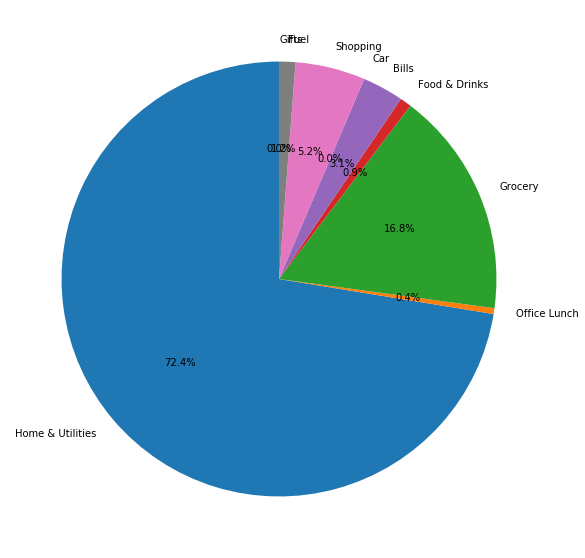

In [11]:
plt.figure(figsize=[10,10])
_ = plt.pie(df_expense.Amount,labels=df_expense.index,shadow=False, startangle=90,autopct='%1.1f%%')

In [12]:
show(fin.plot_expense(df_expense))

# Amount available for investment

In [13]:
salary_take_home = salary
salary_take_home

4571.42

In [14]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $802.55


In [15]:
storage = salary_take_home - df_expense.Amount.sum()
guilt_free_money = 0.1*storage
storage = storage - guilt_free_money
invest_perc = 100*storage/salary_take_home

print(f"Amount available for guilt free expenditure : ${guilt_free_money:.2f}")
print(f"Amount available for investment : ${storage:.2f} {invest_perc:.2f}%")

Amount available for guilt free expenditure : $275.60
Amount available for investment : $2480.37 54.26%


In [16]:
df_goal = pd.read_csv("model_goal_allocation.csv",index_col='goal',usecols=['goal','model_investment'])
df_goal['asset_ratio'] = df_goal.model_investment / df_goal.model_investment.sum()
df_goal['actual_investment'] = df_goal.asset_ratio * storage
df_goal['delta'] = df_goal.actual_investment - df_goal.model_investment
df_goal

,model_investment,asset_ratio,actual_investment,delta
goal,,,,
home,1550.693801,0.507803,1259.540436,-291.153365
vacation,234.204323,0.076694,190.230860,-43.973463
wedding,377.733955,0.123696,306.811822,-70.922133
retirement,891.100000,0.291807,723.789882,-167.310118


In [17]:
df_report = pd.concat([df_expense.Amount,df_goal.actual_investment])

In [18]:
df_report = df_report.append(pd.Series([guilt_free_money],index=['Guilt Free']))

In [19]:
df_report = df_report.to_frame(name='value')
df_report['percentage'] = 100*df_report.value/df_report.value.sum()
df_report

,value,percentage
Home & Utilities,1314.820000,28.761741
Office Lunch,7.810000,0.170844
Grocery,305.280000,6.678013
Food & Drinks,15.620000,0.341688
Bills,55.590000,1.216034
Car,0.000000,0.000000
Shopping,94.280000,2.062379
Fuel,22.050000,0.482345
Gifts,0.000000,0.000000
home,1259.540436,27.552499


In [20]:
df_report.sum()

value         4571.42
percentage     100.00
dtype: float64

In [21]:
df_report.to_csv('report_april_2020.csv')